# Using Python to get financial data
- MSDS 430 - Python for data Science 
- Carrie Lu & Ryan Zimmerman


##### Introduction
For the final project we're going to work with financial data.  We're planning to use the Pandas data reader and iex API as no importing of CSV datasets is necessary and this can give more real time data if needed. 

##### Table of contents

- Part 1: Reading in financial statements through Pandas data reader and through CSV
- Part 2: Plots & calculations
- Part 3: Defined Functions // Ploting multiple stocks // Ploting multiple stocks by pct gain
- Part 4: Using the iex package and beautiful soup to scrub financial statments
- Part 5: Using the financial statments to evaluate a business

#### Part 1 Reading in Financial Statements
Below we use the pandas data reader to read in up to date financial statments.  IEX is one of the few financial packages currently maintained and allows easy data access via API.

In [229]:
#get the appropriate libraries and import the data
import pandas
from datetime import date,timedelta
from pandas_datareader import data, DataReader

#create object variables start and end
start = date.today()-timedelta(720)
end = date.today()

#set up for stock ticker
ticker = 'GOOG'

#get data from iex
data_source = 'iex'

#create data reader object
stock_data = DataReader(ticker,data_source,start,end)

In [230]:
#table of stock data for google
stock_data.head()

,open,high,low,close,volume
date,,,,,
2016-12-19,790.22,797.6600,786.27,794.20,1232087
2016-12-20,796.76,798.6500,793.27,796.42,951014
2016-12-21,795.84,796.6757,787.10,794.56,1211346
2016-12-22,792.36,793.3200,788.58,791.26,972169
2016-12-23,790.90,792.7400,787.28,789.91,623944


Our professor also wanted us to read in .CSV data so he could see us demonstrate this.  The goal here is to show that we can read in CSV information.  The next step will demonstrate while we got the data from Kaggle.com it it was difficult to find up to date CSV information on stocks.  While with enough research we probably could have, the effort to manually maintain CSV data meant that using Pandas data reader was the preferred method for importing financial information.

#### Part 2: Plotting financial data
Now that we can read financial statements in, let's begin exploring it's data through plots.  In this section we plot the full stock data set for Google, and then refine this chart to just present the stock price at close every day up until the present day.  Lastly we add in a calculation or average as this is often useful in stocks.

In [231]:
#used pandas to do this so we could easily create columns
import pandas as pd

#read in the file and created columns
data = pd.read_csv('prices.csv', sep=",")
data.columns = ['date','symbol','open','close','low','high','volume']

#show just google data
data_goog_index = data['symbol'].str.contains('GOOG')
print(data[data_goog_index].head(5))

#show just google data and sort by date
df = pd.DataFrame(data)
df_filtered = df[(df.symbol == 'GOOG')&(df.date>'2015-01-01')].sort_values(by =['date'],ascending=False)
df_filtered.head()

            date symbol        open       close         low        high  \
439   2010-01-04   GOOG  626.951088  626.751061  624.241073  629.511067   
440   2010-01-04  GOOGL  626.950006  626.750011  624.240011  629.510005   
907   2010-01-05   GOOG  627.181073  623.991055  621.541045  627.841071   
908   2010-01-05  GOOGL  627.180001  623.990017  621.540016  627.839984   
1375  2010-01-06   GOOG  625.861078  608.261023  606.361042  625.861078   

         volume  
439   3927000.0  
440   3908400.0  
907   6031900.0  
908   6003300.0  
1375  7987100.0  


,date,symbol,open,close,low,high,volume
727086,2016-01-07,GOOG,730.309998,726.390015,719.059998,738.500000,2963700.0
726587,2016-01-06,GOOG,730.000000,743.619995,728.919983,747.179993,1947000.0
726088,2016-01-05,GOOG,746.450012,742.580017,738.640015,752.000000,1950700.0
725589,2016-01-04,GOOG,743.000000,741.840027,731.257996,744.059998,3272800.0
725090,2015-12-31,GOOG,769.500000,758.880005,758.340027,769.500000,1489600.0


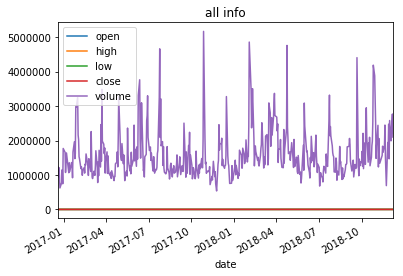

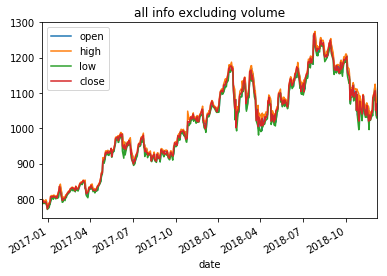

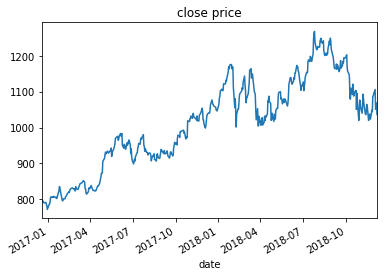

In [232]:
%matplotlib inline
import matplotlib.pyplot as plt

#convert index to date format for plotting display convenience
stock_data.index = pd.to_datetime(stock_data.index)

#plot all variables
stock_data.plot()
plt.title('all info')
plt.show()

#plot all variables
stock_data[['open','high','low','close']].plot()
plt.title('all info excluding volume')
plt.show()

#refining to show google at close over time as volume dominates the first chart
stock_data['close'].plot(title=ticker)
plt.title('close price')
plt.show()

Typically averages are used often to determine a markets major trend, we're going to import the dow jones industrial average and then calculate the average to show how it's changed in the last two years.  This chart includes a calculation.

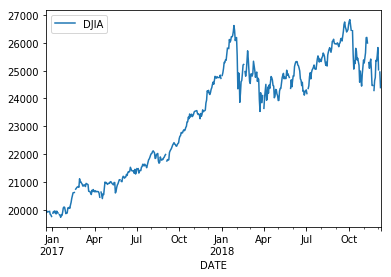

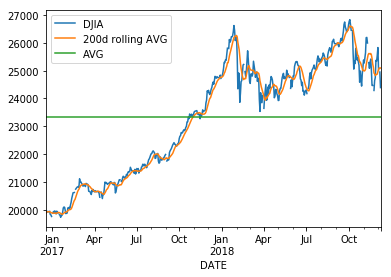

In [233]:
import numpy as np
import pandas as pd

#read in dow jones data from Fred
data = DataReader('DJIA', 'fred', start, end)

#convert index to date format for plotting display convenience
data.index = pd.to_datetime(data.index)

#dow jones over time
data.plot()
plt.show()

# adding in an average line
data.insert(1,'AVG',(np.sum(data.DJIA)/data.DJIA.count()))

#adding in an rolling average line
data.insert(1,'200d rolling AVG',data.DJIA.rolling(window=10,min_periods=1).mean())

#dow jones over time
data.plot()
plt.show()


In the next step we create an array for the dow jones industrial average and compare it to the previous day.  By doing this we determine the largest increases and decreases in the DJIA in the past two years

In [234]:
#Arrays 
# array calculation may have some problem if start-1 day has no data, but end day has data. in that way x,y will be different size.
# import numpy 
# x = numpy.array(DataReader('DJIA', 'fred', start, end))
# y = numpy.array(DataReader('DJIA', 'fred', (start-timedelta(1)), (end-timedelta(1))))
#Matrix calculations
# z = numpy.divide(x,y)

import numpy 
x = DataReader('DJIA', 'fred', start, end)
x = x.dropna()
x = numpy.array(x)
#Matrix calculations
z = numpy.divide(x[1:],x[0:-1])
print('The Max daily positive change in the Dow Jones in the past 2 years is:',  "{0:.5f}%".format((max(z)[0]-1)*100))
print('The Max daily negative change in the down gones in the past 2 years is:', "{0:.5f}%".format(-((1-min(z)[0]))*100))

The Max daily positive change in the Dow Jones in the past 2 years is: 2.84449%
The Max daily negative change in the down gones in the past 2 years is: -4.60488%


#### Part 3 : User defined functions and plotting multiple stocks at a time
Now that we can plot stock data let's move on to creating user defined functions.  Let's create a few functions that allows a user to input data and return a plot for a certain stock over a certain time period.  All the plots to date plot a single stock over time the goal for the next section is to plot multiple stocks, and then plot multiple stocks by percentage increase to see how they are performing in terms of growth.

Please enter a stock symbol: GOOG
Please enter a start date in YYYY-MM-DD format: 2018-01-01
Please enter an end date in YYYY-MM-DD format: 2018-12-06


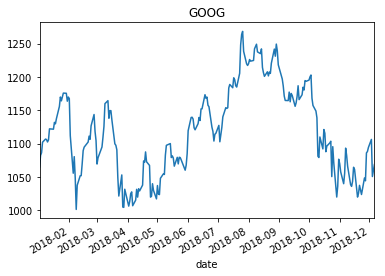

In [235]:
import pandas
from datetime import date,timedelta
from pandas_datareader import data, DataReader


#creating a function to pull data for a user input stock
while True:
    try:
        ticker = str(input("Please enter a stock symbol: "))
        start = str(input("Please enter a start date in YYYY-MM-DD format: "))
        end = str(input("Please enter an end date in YYYY-MM-DD format: "))
        data_source = 'iex'
        stock_data = DataReader(ticker,data_source,start,end)
        stock_data.index = pd.to_datetime(stock_data.index)
        stock_data['close'].plot(title=ticker)
        break  
        
    except ValueError:
        print("Please enter a valid stock symbol and a date in YYYY-MM-DD format, e.g.: 2018-11-23")


Let's add in another function that allows the user to input and return results

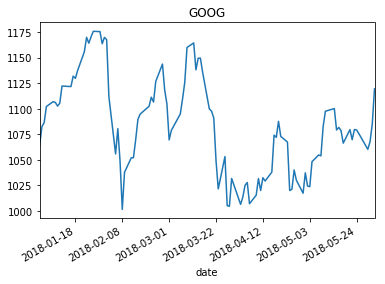

In [236]:
#creating a user defined function to do the same thing
def stock_chart(ticker,data_source, start, end):
        stock_data = DataReader(ticker,data_source,start,end)
        stock_data.index = pd.to_datetime(stock_data.index)
        return stock_data['close'].plot(title=ticker) 

stock_chart('GOOG', 'iex', '2018-01-01', '2018-06-01')

Let us now uplevel this project by doing what you can't do with public data - compare two stocks at a time

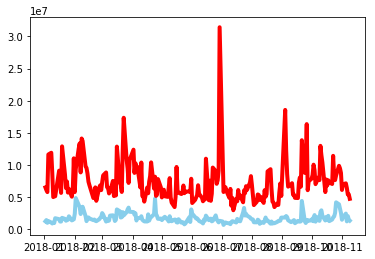

In [237]:
#comparing 2 stocks at a time
stock_data1 = DataReader('GOOG','iex','2018-01-01','2018-11-10')
stock_data2 = DataReader('NKE','iex','2018-01-01','2018-11-10')
stock_data1.index = pd.to_datetime(stock_data1.index)
stock_data2.index = pd.to_datetime(stock_data2.index)

plt.plot( 'volume',data=stock_data1, markersize=1, color='skyblue', linewidth=4)
plt.plot( 'volume',data=stock_data2, markersize=1, color='red', linewidth=4)

Comparing volumes is useful, but it's really not that helpful to the average investor.  Let's now create a function that normalizes the data in terms of percentage gain.  This function also includes conditional statements, transformations and calculations

In [238]:
#creating a function to compare stocks on percentage increase
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_datareader import data, DataReader
def compare_various_stock_info(stock_list, data_source='iex',start='2018-01-01',end='2018-11-10',
                               compare_type='volume',convert_to_percentage=True):
    #comparing 2 stocks at a time
    fig, ax = plt.subplots()
    for stock in stock_list:
        stock_data = DataReader(stock,data_source,start,end)
        stock_data.index = pd.to_datetime(stock_data.index)
        if convert_to_percentage is True:
            stock_data[compare_type] = stock_data[compare_type].divide(stock_data[compare_type][0])
        ax.plot(compare_type,data=stock_data, markersize=1,  linewidth=4, label=stock)
    ax.set_xlabel("Date") 
    if convert_to_percentage:
        ax.set_ylabel("comparing {} for {}, converted to percentage".format(compare_type, stock_list)) 
    else:
        ax.set_ylabel("comparing {} for {}".format(compare_type, stock_list)) 
    ax.legend() # show labels of the lines
    fig.autofmt_xdate() # make the date rotate 45 degree

In [239]:
#creating a function to pull data for a user input stock
def run():
    tickers = str(input("Please enter stock symbols (seperated by ,): "))
    ticker_list = tickers.split(",")
    start = str(input("Please enter a start date in YYYY-MM-DD format: "))
    end = str(input("Please enter an end date in YYYY-MM-DD format: "))
    compare_type = str(input("enter content to compare (close, volume etc.):"))
    convert_to_percentage = int(input("enter convert to percentage or not (0 for false, 1 for true):"))
    convert_to_percentage = bool(convert_to_percentage)
    compare_various_stock_info(stock_list = ticker_list, start=start, end=end, compare_type=compare_type, convert_to_percentage=convert_to_percentage)

Please enter stock symbols (seperated by ,): GOOG,MSFT,FB
Please enter a start date in YYYY-MM-DD format: 2018-01-01
Please enter an end date in YYYY-MM-DD format: 2018-12-06
enter content to compare (close, volume etc.):close
enter convert to percentage or not (0 for false, 1 for true):1


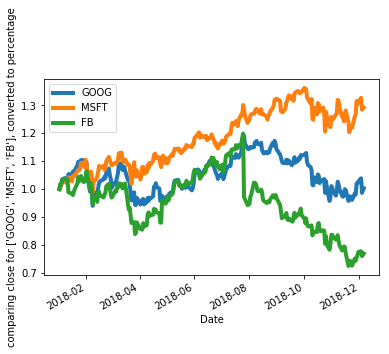

In [240]:
# compare_various_stock_info(['GOOG','FB','MSFT'])
run()

#### Part 3 Summary:
As we can see more recently many of the stocks have decreased in total value, however microsoft has actually increased slightly


#### Part 4: Parsing financial statements to help build out the Owner Earning Formula
Being honest reading in stock market prices is helpful particularly given the fact we can plot multiple charts against one another, however to truely be able to make the call on investing in a company we have to at the very least undstand some of the fundamentals of the company.  We get these fundamentals from the financial statements

In [241]:
#to get this working you have to installl the iex python package https://pypi.org/project/iexfinance/

#setting up stock reader
from iexfinance import StockReader

#formatting financial data for google
a =  StockReader("GOOG")
Financials = a.get_financials(period = 'annual')
Financials = pandas.DataFrame.from_dict(Financials)

Financials.head()

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,reportDate,researchAndDevelopment,shareholderEquity,totalAssets,totalCash,totalDebt,totalLiabilities,totalRevenue
0,-2608000000,37091000000,45583000000,124308000000,10715000000,NaN,65272000000,12662000000,36390000000,194000000,28882000000,95375000000,2017-12-31,16625000000,152502000000,197295000000,101871000000,NaN,44793000000,110855000000
1,-3461000000,36036000000,35138000000,105408000000,12918000000,NaN,55134000000,19478000000,31418000000,275000000,23716000000,79383000000,2016-12-31,13948000000,139036000000,167497000000,86333000000,NaN,28461000000,90272000000
2,-1364000000,26024000000,28164000000,90114000000,16549000000,3.225000e+09,46825000000,16348000000,27465000000,334000000,19360000000,67390000000,2015-12-31,12282000000,120331000000,147461000000,73066000000,5.220000e+09,27130000000,74989000000
3,-118000000,22376000000,25691000000,78656000000,18347000000,2.009000e+09,40310000000,14444000000,23814000000,-1025000000,16496000000,59056000000,2014-12-31,9832000000,103860000000,129187000000,64395000000,5.237000e+09,25327000000,66001000000


Calculating Owner Earners: 
Calculating owner earnings is one of the many ways Rule 1 Investors (Warren Buffet) Evaluate stocks.  Calculating owner earnings is somewhat subjective, but Warren Buffets formula was broken down more recently in Invested (the book, but also in the podcas). The owner earnings formula we will work on calculating is below

Owner Earnings (taken from Invested)

+ Net Income
+ +Depreciation and Amortization
+ +Net Change: Accounts Receivable
+ +Net Change: Accounts Payable
+ +Income Tax
+ +Maintenance Capex

In [242]:
#Getting the cashflow statements will also require beautiful soup
import requests 
import re
import json
import numpy as np
from bs4 import BeautifulSoup
import pandas

url = 'https://finance.yahoo.com/quote/AAPL/financials?p=AAPL'
html = requests.get(url).text
soup = BeautifulSoup(html,'html.parser')

soup_script = soup.find("script",text=re.compile("root.App.main")).text
script = soup.find("script",text=re.compile("root.App.main")).text

json_script = json.loads(re.search("root.App.main\s+=\s+(\{.*\})",soup_script)[1])
fin_data = json_script['context']['dispatcher']['stores']['QuoteSummaryStore']

cash_yr = fin_data['cashflowStatementHistory']['cashflowStatements']
cash_qtrs = fin_data['cashflowStatementHistoryQuarterly']['cashflowStatements']

cash_flow = pandas.DataFrame.from_dict(cash_yr)

df = pandas.DataFrame(cash_yr)

# solution to get raw value
def get_raw_value_in_statement(a):
    try:
        return a['raw']
    except:
        return a
df = df.applymap(get_raw_value_in_statement)
df

,capitalExpenditures,changeInCash,changeToAccountReceivables,changeToInventory,changeToLiabilities,changeToNetincome,changeToOperatingActivities,depreciation,dividendsPaid,endDate,...,issuanceOfStock,maxAge,netBorrowings,netIncome,otherCashflowsFromFinancingActivities,otherCashflowsFromInvestingActivities,repurchaseOfStock,totalCashFromFinancingActivities,totalCashFromOperatingActivities,totalCashflowsFromInvestingActivities
0,-13313000000,5624000000,-5322000000,828000000,9131000000,-27694000000,30057000000,10903000000,-13712000000,1538179200,...,669000000,1,432000000,59531000000,NaN,-745000000,-75265000000,-87876000000,77434000000,16066000000
1,-12451000000,-195000000,-2093000000,-2723000000,8340000000,10640000000,-8447000000,10157000000,-12769000000,1506729600,...,555000000,1,29014000000,48351000000,NaN,-124000000,-34774000000,-17974000000,64225000000,-46446000000
2,-12734000000,-636000000,527000000,217000000,563000000,9634000000,-902000000,10505000000,-12150000000,1474675200,...,495000000,1,22057000000,45687000000,NaN,-924000000,-31292000000,-20890000000,66231000000,-45977000000
3,-11247000000,7276000000,417000000,-238000000,6043000000,5353000000,5040000000,11257000000,-11561000000,1443225600,...,543000000,1,29305000000,53394000000,749000000.0,-26000000,-36752000000,-17716000000,81266000000,-56274000000


In the next step we create this into a less manual process, by converting this to a function with prompts

In [243]:
# change it to a function.
def get_statement(ticker, frequency='year'):
    def get_raw_value_in_statement(a):
        try:
            return a['raw']
        except:
            return a
    url = 'https://finance.yahoo.com/quote/{}/financials?p={}'.format(ticker, ticker)
    try:
        html = requests.get(url).text
        soup = BeautifulSoup(html,'html.parser')
        soup_script = soup.find("script",text=re.compile("root.App.main")).text
        script = soup.find("script",text=re.compile("root.App.main")).text
        json_script = json.loads(re.search("root.App.main\s+=\s+(\{.*\})",soup_script)[1])
        fin_data = json_script['context']['dispatcher']['stores']['QuoteSummaryStore']
    except:
        raise Exception("please input a valid ticker")
    cash_yr = fin_data['cashflowStatementHistory']['cashflowStatements']
    cash_qtrs = fin_data['cashflowStatementHistoryQuarterly']['cashflowStatements']
    if frequency == 'year':
#         cash_flow = pandas.DataFrame.from_dict(cash_yr)
        df = pandas.DataFrame(cash_yr)
        df = df.applymap(get_raw_value_in_statement)
    elif frequency == 'quarter':
#         cash_flow = pandas.DataFrame.from_dict(cash_qtrs)
        df = pandas.DataFrame(cash_qtrs)
        df = df.applymap(get_raw_value_in_statement)
    else:
        raise Exception("please input a valid frequency")
    return df

In [244]:
#using below you can pull the annual data for cash flow statements
cashflow = get_statement("GOOG",frequency='year')
#df = get_statement("GOOG",frequency='quarter')
cashflow.head()

,capitalExpenditures,changeInCash,changeToAccountReceivables,changeToLiabilities,changeToNetincome,changeToOperatingActivities,depreciation,effectOfExchangeRate,endDate,investments,maxAge,netBorrowings,netIncome,otherCashflowsFromFinancingActivities,otherCashflowsFromInvestingActivities,repurchaseOfStock,totalCashFromFinancingActivities,totalCashFromOperatingActivities,totalCashflowsFromInvestingActivities
0,-13184000000,-2203000000,-3768000000,1121000000,8284000000,3682000000,6899000000,405000000,1514678400,-19448000000,1,-86000000,12662000000,-3366000000,1419000000,-4846000000,-8298000000,37091000000,-31401000000
1,-10212000000,-3631000000,-2578000000,333000000,7158000000,2420000000,6100000000,-170000000,1483142400,-18229000000,1,-1335000000,19478000000,-3304000000,-1978000000,-3693000000,-8332000000,36036000000,-31165000000
2,-9950000000,-1798000000,-2094000000,246000000,5609000000,1618000000,5024000000,-434000000,1451520000,-13635000000,1,-23000000,16348000000,-2422000000,75000000,-1780000000,-4225000000,26572000000,-23711000000
3,-11014000000,-551000000,-1641000000,261000000,3615000000,1461000000,4601000000,-433000000,1419984000,-6222000000,1,-18000000,14136000000,-2069000000,628000000,-1780000000,-2087000000,23024000000,-21055000000


To get all the inputs we need we need to add in the balance sheet as well, so the next step pulls in new data as well

In [245]:
# change it to a function.
def get_balance(ticker, frequency='year'):
    def get_raw_value_in_statement(a):
        try:
            return a['raw']
        except:
            return a
    url = 'https://finance.yahoo.com/quote/{}/financials?p={}'.format(ticker, ticker)
    try:
        html = requests.get(url).text
        soup = BeautifulSoup(html,'html.parser')
        soup_script = soup.find("script",text=re.compile("root.App.main")).text
        script = soup.find("script",text=re.compile("root.App.main")).text
        json_script = json.loads(re.search("root.App.main\s+=\s+(\{.*\})",soup_script)[1])
        fin_data = json_script['context']['dispatcher']['stores']['QuoteSummaryStore']
    except:
        raise Exception("please input a valid ticker")
    cash_yr = fin_data['balanceSheetHistory']['balanceSheetStatements']
    cash_qtrs = fin_data['balanceSheetHistoryQuarterly']['balanceSheetStatements']
    if frequency == 'year':
#         cash_flow = pandas.DataFrame.from_dict(cash_yr)
        df = pandas.DataFrame(cash_yr)
        df = df.applymap(get_raw_value_in_statement)
    elif frequency == 'quarter':
#         cash_flow = pandas.DataFrame.from_dict(cash_qtrs)
        df = pandas.DataFrame(cash_qtrs)
        df = df.applymap(get_raw_value_in_statement)
    else:
        raise Exception("please input a valid frequency")
    return df



In [246]:
balance = get_balance("GOOG",frequency='year')
balance.head()

,accountsPayable,cash,commonStock,deferredLongTermAssetCharges,endDate,goodWill,intangibleAssets,inventory,longTermDebt,longTermInvestments,...,propertyPlantEquipment,retainedEarnings,shortLongTermDebt,shortTermInvestments,totalAssets,totalCurrentAssets,totalCurrentLiabilities,totalLiab,totalStockholderEquity,treasuryStock
0,3137000000,10715000000,40247000000,680000000,1514678400,16747000000,2692000000,749000000.0,3943000000,7813000000,...,42383000000,113247000000,NaN,91156000000,197295000000,124308000000,24183000000,44793000000,152502000000,-992000000
1,2041000000,12918000000,36307000000,383000000,1483142400,16468000000,3307000000,268000000.0,3935000000,5878000000,...,34234000000,105131000000,NaN,73415000000,167497000000,105408000000,16756000000,28461000000,139036000000,-2402000000
2,1931000000,15409000000,32982000000,251000000,1451520000,15869000000,3847000000,491000000.0,1995000000,5183000000,...,29016000000,89223000000,1.000000e+09,56517000000,147461000000,90114000000,19310000000,27130000000,120331000000,-1874000000
3,1715000000,16585000000,28767000000,176000000,1419984000,15599000000,4607000000,NaN,2992000000,3079000000,...,23883000000,75066000000,NaN,46048000000,129187000000,78656000000,16779000000,25327000000,103860000000,27000000


Last part is to scrub the income statement

In [247]:
# change it to a function.
def get_income(ticker, frequency='year'):
    def get_raw_value_in_statement(a):
        try:
            return a['raw']
        except:
            return a
    url = 'https://finance.yahoo.com/quote/{}/financials?p={}'.format(ticker, ticker)
    try:
        html = requests.get(url).text
        soup = BeautifulSoup(html,'html.parser')
        soup_script = soup.find("script",text=re.compile("root.App.main")).text
        script = soup.find("script",text=re.compile("root.App.main")).text
        json_script = json.loads(re.search("root.App.main\s+=\s+(\{.*\})",soup_script)[1])
        fin_data = json_script['context']['dispatcher']['stores']['QuoteSummaryStore']
    except:
        raise Exception("please input a valid ticker")
    cash_yr = fin_data['incomeStatementHistory']['incomeStatementHistory']
    cash_qtrs = fin_data['incomeStatementHistoryQuarterly']['incomeStatementHistory']
    if frequency == 'year':
#         cash_flow = pandas.DataFrame.from_dict(cash_yr)
        df = pandas.DataFrame(cash_yr)
        df = df.applymap(get_raw_value_in_statement)
    elif frequency == 'quarter':
#         cash_flow = pandas.DataFrame.from_dict(cash_qtrs)
        df = pandas.DataFrame(cash_qtrs)
        df = df.applymap(get_raw_value_in_statement)
    else:
        raise Exception("please input a valid frequency")
    return df


In [248]:
income = get_income("GOOG",frequency='year')
income.head()

,costOfRevenue,discontinuedOperations,ebit,effectOfAccountingCharges,endDate,extraordinaryItems,grossProfit,incomeBeforeTax,incomeTaxExpense,interestExpense,...,netIncomeFromContinuingOps,nonRecurring,operatingIncome,otherItems,otherOperatingExpenses,researchDevelopment,sellingGeneralAdministrative,totalOperatingExpenses,totalOtherIncomeExpenseNet,totalRevenue
0,45583000000,{},28882000000,{},1514678400,{},65272000000,27193000000,14531000000,-109000000,...,12662000000,{},28882000000,{},{},16625000000,19765000000,81973000000,-1689000000,110855000000
1,35138000000,{},23716000000,{},1483142400,{},55134000000,24150000000,4672000000,-124000000,...,19478000000,{},23716000000,{},{},13948000000,17470000000,66556000000,434000000,90272000000
2,28164000000,{},19360000000,{},1451520000,{},46825000000,19651000000,3303000000,-104000000,...,16348000000,{},19360000000,{},{},12282000000,15183000000,55629000000,291000000,74989000000
3,25313000000,516000000,16874000000,{},1419984000,{},40688000000,17259000000,3639000000,-101000000,...,13620000000,{},16874000000,{},{},9832000000,13982000000,49127000000,385000000,66001000000


Ok we should now have all the information we need for owner earnings let's begin combining this information: Financials, balance, cashflow.  

#### Part 5
Once again we'll be trying to calculate owner earnings which is the total earnings of a business, adding in expenses.  Below is the formula (we did have to estimate maintenance capex using depreciation twice given it's usually a derivative of depreciation and not typically found in statements)  

Owner Earnings (taken from Invested)

+ Net Income
+ +Depreciation and Amortization
+ +Net Change: Accounts Receivable 
+ +Net Change: Accounts Payable
+ +Income Tax
+ +Maintenance Capex (we will use depreciation again)

Therefore, for google, if the owner earnings*10 cost less than the overall stock (taking the price of the stock times the number outstanding we are getting a good deal). Let's now calculate owner earnings * 10 and get the total stock price as well.  

In [250]:
#calculating owner earnings
owner_earnings = np.sum([
Financials['netIncome'].iloc[0], 
cashflow['depreciation'].iloc[0],
cashflow['changeToAccountReceivables'].iloc[0],
cashflow['changeToLiabilities'].iloc[0],   
income['incomeTaxExpense'].iloc[0],
cashflow['depreciation'].iloc[0]]
)*10

#owner earnings
print('For Google the true value of the business is: ',
owner_earnings
     )


#Calculating total price
shares = 19605052
stock_data1 = DataReader('GOOG','iex','2018-12-07','2018-12-07')
cost = shares*stock_data1['close'].iloc[0]

print('For Google the cost of the total business is: ',
cost
     )



For Google the true value of the business is:  383440000000
For Google the cost of the total business is:  20322204802.2


This looks like a buy, but now let's now create a funtction to determine if we should buy google

In [251]:
def buy_or_not(cost_1,owner_earnings_1):
    cost_1 = cost
    owner_earnings_1 = owner_earnings
    if cost < owner_earnings:
        return True

buy_or_not(cost,owner_earnings)

True

Therefore at it's current price given our formula we should buy google!

## Summary

In our final project Carrie Lu and I learned how to use Python to scrub financial statments.  We also learned how to manipulate and work with this data in detail.  For example you can see that we now know how not only to read in information, but also how to leverage it to do interesting this such as plotting percentage gain of multiple stocks.  Further we know how to use this information to evaluate businesses and determine if we feel like we should buy them or not.  We will likely massage the owner earnings formula in the future, however this did teach us how to find the information but also how to use it for some of the purposes we wanted (evaluating stocks).  Overall this was a fun class, and we both learned a lot, thanks again for all the help Professor.  

-Ryan & Carrie
